In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import yfinance as yf

In [ ]:
def read_data(buy="MSFT", short="BNB-USD"):
    # Define the tickers
    buy = yf.Ticker(buy)
    short = yf.Ticker(short)

    # Get the historical data for one year
    buy_data = buy.history(start="2022-04-19", end="2023-04-19")
    short_data = short.history(start="2022-04-19", end="2023-04-19")
    
    # Extract the date part from the index data
    buy_data.index = buy_data.index.date
    short_data.index = short_data.index.date
    
    # Ensure that both dates align
    buy_data, short_data = buy_data.align(short_data, join='inner', axis=0)
    
    return buy_data, short_data

In [ ]:
buy_data, short_data = read_data()

In [ ]:
buy_data.shape, short_data.shape

In [ ]:
def compute_statistics(buy_data=buy_data, short_data=short_data):
    # Calculate the daily returns
    buy_returns = buy_data["Close"].pct_change().dropna()
    short_returns = short_data["Close"].pct_change().dropna()

    # Calculate the mean and standard deviation of the daily returns
    buy_mean = np.mean(buy_returns*100)
    buy_std = np.std(buy_returns*100)
    short_mean = np.mean(short_returns*100)
    short_std = np.std(short_returns*100)

    print("============STATISTICS============")
    print("The average of the stock returns is:", buy_mean)
    print("The volatility of the stock returns is:", buy_std)
    print("The average of the crypto returns is:", short_mean)
    print("The volatility of the crypto returns is:", short_std)
    print("==================================================")
    print("==================================================")

    # Calculate the skewness and kurtosis of the daily returns
    buy_skew = skew(buy_returns)
    buy_kurt = kurtosis(buy_returns)
    short_skew = skew(short_returns)
    short_kurt = kurtosis(short_returns)
    print("============KURTOSIS AND SKEWNESS============")
    print("The skewness of the stock returns is:", buy_skew)
    print("The kurtosis of stock returns is:", buy_kurt)
    print("The skewness of crypto returns is:", short_skew)
    print("The kurtosis of crypto returns is:", short_kurt)
    
    return buy_mean,buy_std,short_mean,short_std, buy_returns, short_returns

In [ ]:
buy_mean,buy_std,short_mean,short_std, buy_returns, short_returns = compute_statistics()

In [ ]:
def corr_cov(buy_data=buy_data, short_data=short_data): 
    # Merge the data by using the common dates
    merged_data = pd.merge(buy_data, short_data, left_index=True, right_index=True)

    # Drop any missing values
    merged_data = merged_data.dropna()

    # Calculate the daily returns of AMZN and DOGE from the merged data
    stock_returns = merged_data["Close_x"].pct_change().dropna()
    crypto_returns = merged_data["Close_y"].pct_change().dropna()

    # Calculate the correlation matrix of the daily returns of AMZN and DOGE
    corr_matrix = np.corrcoef(stock_returns, crypto_returns)
    corr_table = pd.DataFrame(corr_matrix, index=["stock", "crypto"], columns=["stock", "crypto"])
    print("CORRELATION MATRIX OF THE STOCK AND CRYPTO INVESTMENTS")
    print(corr_table)

    # Calculate the covariance matrix of the daily returns of AMZN and DOGE
    cov_matrix = np.cov(stock_returns, crypto_returns)

    # Display the covariance matrix in a table format
    cov_table = pd.DataFrame(cov_matrix, index=["stock", "crypto"], columns=["stock", "crypto"])
    print("==================================================")
    print("==================================================")
    print("COVARIANCE MATRIX OF THE STOCK AND CRPTO INVESTMENTS")
    print(cov_table)
    return corr_matrix, cov_matrix, merged_data

corr_matrix,cov_matrix, merged_data = corr_cov()

### Spearman correlation 

merged_data[["Close_x","Close_y"]].corr(method='spearman')

def port_return_risk(stock_mean=buy_mean, stock_sd=buy_std, stock_weight=1.6, crypto_mean=short_mean, crypto_sd=short_std, crypto_weight=-0.6):
    # Calculate the expected return of portfolio A
    exp_return = stock_weight*stock_mean + crypto_weight*crypto_mean

    # Calculate the risk (or volatility) of portfolio A
    variance = (stock_weight**2 * stock_sd**2) + (crypto_weight**2 * crypto_sd**2) + (2 * stock_weight * crypto_weight * corr_matrix[0][1] * stock_sd * crypto_sd)
    std_dev = np.sqrt(variance)

    # Print the results
    print(f"The expected return of portfolio A is: {np.round(exp_return,3)}")
    print(f"The risk (or volatility) of portfolio A is:{np.round(std_dev,3)}")

port_return_risk()

## Plots

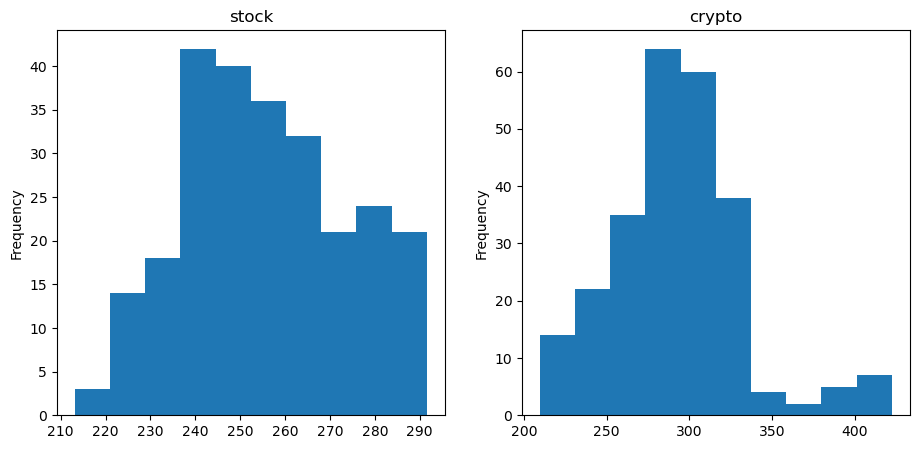

In [ ]:
fig,axs = plt.subplots(1,2, figsize=(11,5))
buy_data["Close"].plot(kind="hist",grid=False, ax=axs[0], title="stock")
short_data["Close"].plot(kind="hist",grid=False, ax=axs[1], title="crypto");

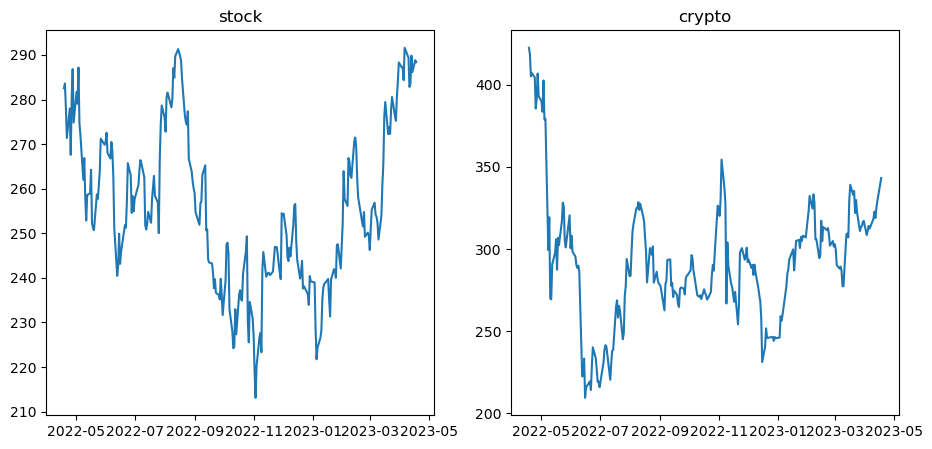

In [ ]:
fig,axs = plt.subplots(1,2, figsize=(11,5))
buy_data["Close"].plot(title="stock", ax=axs[0])
short_data["Close"].plot(title="crypto", ax=axs[1]);

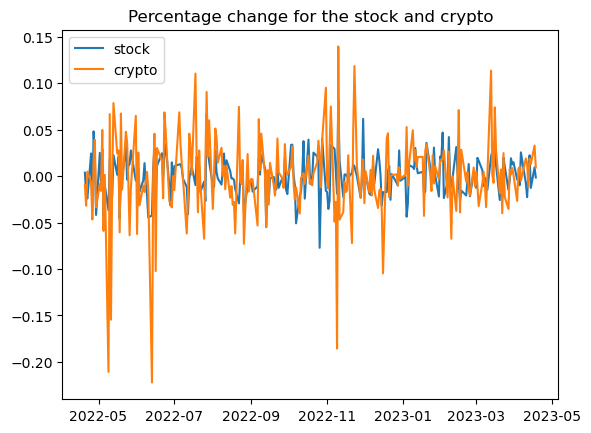

In [ ]:
# Plot the percentage change of AMZN and DOGE
plt.plot(buy_returns, label="stock")
plt.plot(short_returns, label="crypto")
plt.title("Percentage change for the stock and crypto")
plt.legend()
plt.show()

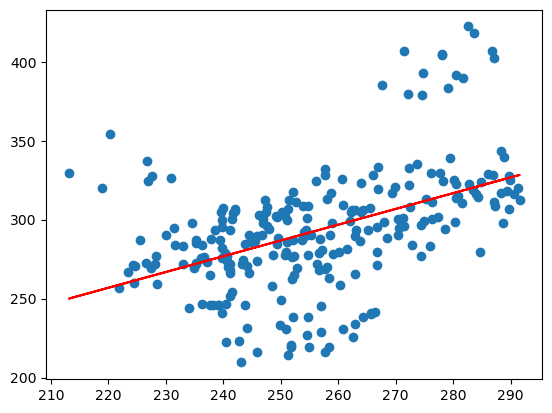

In [ ]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(buy_data["Close"], short_data["Close"])
plt.scatter(buy_data["Close"], short_data["Close"])
plt.plot(buy_data["Close"], slope * buy_data["Close"] + intercept, color="red")
plt.show()